## Customer Segmentation using K-Means

### Import necessary libraries

In [54]:

import pandas as pd  #pandas for data analysis
import numpy as np  #numpy for maths
import seaborn as sns  #seaborn for exploring and visualizing
import matplotlib.pyplot as plt #matplotlib for ploting
from sklearn.preprocessing import MinMaxScaler,LabelEncoder # MMS for normalization
from sklearn.cluster import KMeans, AgglomerativeClustering
from pandas.api.types import is_string_dtype, is_numeric_dtype    



### Load data

In [46]:

df = pd.read_csv("data/Mall_Customers.csv")
df = df.drop(["CustomerID"],axis = 1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### First step with some data inspection and transformation

In [47]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [48]:
types = df.dtypes
print(types)

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


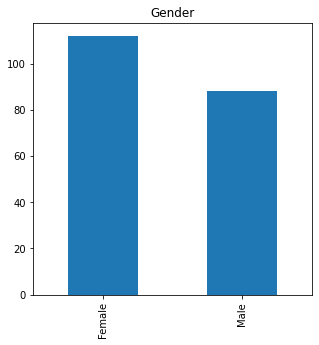

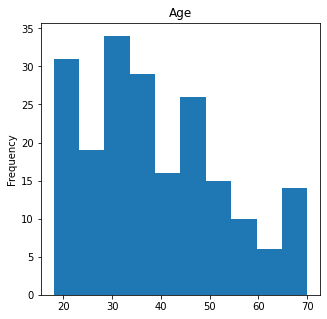

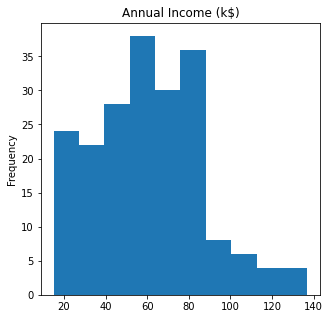

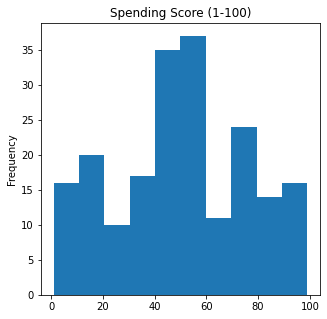

In [49]:
for col in df:
    plt.figure(col, figsize = (5,5))
    plt.title(col)
    if is_numeric_dtype(df[col]):
        df[col].plot(kind='hist')
    elif is_string_dtype(df[col]):
        df[col].value_counts()[:10].plot(kind = 'bar')#Top 10 value count in each categorical data
        

#### Process data

In [56]:
df['Gender'] = LabelEncoder().fit_transform(df["Gender"])

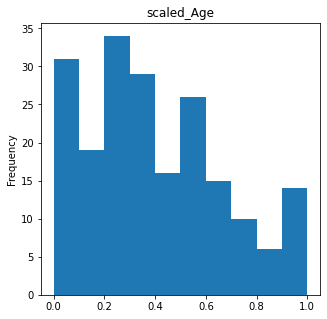

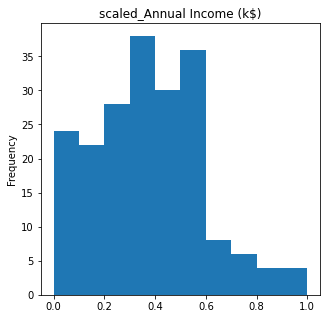

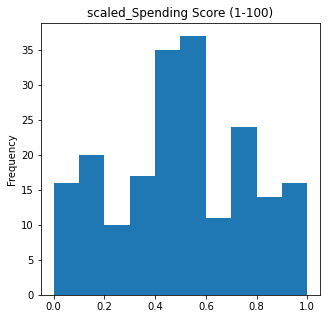

In [57]:
scaler = MinMaxScaler()
#for var in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Female','Male']:
for var in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    scaled_var = "scaled_" + var
    model = scaler.fit(df[var].values.reshape(-1,1))
    df[scaled_var] =  model.transform(df[var].values.reshape(-1,1))
    plt.figure(figsize=(5,5))
    plt.title(scaled_var)
    df[scaled_var].plot(kind = 'hist')

### Explore 

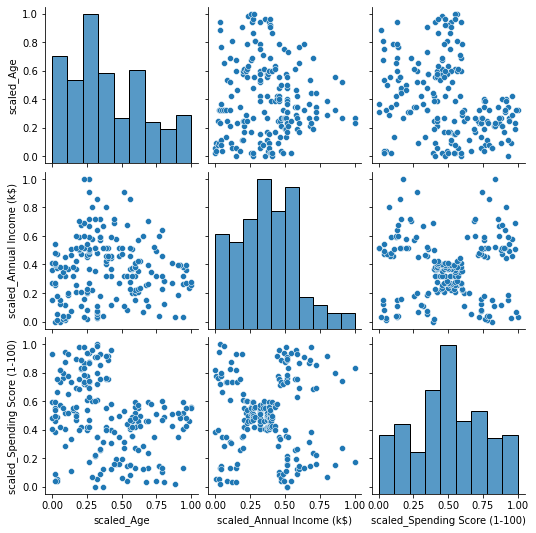

In [58]:
#columns =['scaled_Age','scaled_Annual Income (k$)','scaled_Spending Score (1-100)','scaled_Female','scaled_Male']
columns =['scaled_Age','scaled_Annual Income (k$)','scaled_Spending Score (1-100)']

sns.pairplot(df[columns])

## Unsupervised model : Classification Hierarchique (Méthode de Ward)


## Unsupervised model : Kmeans


### Principes de base
L'algorithme du K-means (appelé algorithme des centres mobiles ) a pour but de regrouper une population dans k classes. A la différence de la CAH cette méthode ne fait pas de lien hiérarchique entre les classes. Ainsi le fonctionnement générique du K-means est comme suit :
* A partir de la population disponible on choisit autant de point que de classes (s'en suivra quelques mesures pour aider a détérminer le nombre de classes)
* On calcule la distance de chaque point du regrouppement par rapport au point désigné précédemment et on forme alors k groupes de la manière suivante : chaque groupe est constitué d’un centre et des individus les plus proches de ce centre que d’un autre.
* On calcul le centre de gravité de chacun des groupes et on répété l'étape précédente (i.e. calcul des distance, constituation des groupes autour des nouveau centres de gravités et des individus les plus proches) 
*  On itère jusqu'a ce que 2 itérations produisent le même regroupement

### Détérminer le nombre de classes
Il existe différentes mesures qui décrivent la segmentation et qui permettent en amont de déterminer le nombre optimal de clusters.    
-La mesure de **compacité** *(WSS)* qui est la distance totale entre les objets du cluster et le centroid respectif.  
-La mesure de **séparation** *(BSS)* qui est la distance totale pondérer des centroids des clusters par rapport à la moyenne des objets.  
-La mesure **Global** *(TSS)* qui est la distance totale des points de données par rapport à la moyenne globale des données. 
  
Il existe aussi une metrique qui prend en compte la variance entre cluster et la compacité, autrement dit la variance intra cluster, cette metrique est plus connu sous le nom **Calinski-Harabasz** index 

### Initialiser les K-means (IL FAUT CITER LES SOURCES)
La méthode d'initialisation défini la manière avec laquelle les 1ers centroides sont définis lors de la 1ère itération du kmeans. Ci dessous quelques méthodes :
**Forgy** : Cette méthode est considèrée comme étant la plus simple et la plus rapide. Le principe est le suivant choisir aléatoirement parmis tous les points a segmenter k points et les désigner comme centroides.   
**Random Partition method** : Cette méthode va attribuer aléatoirement à chaque point un cluster ID. Les données auxquels on aura attribué un même cluster ID seront moyennées afin d'obtenir les points initiaux.  
**Kmeans++**  Cette méthode choisit les centroides de manière à pousser les centroïdes aussi loin que possible l'un de l'autre. l'objectif est de couvrir l'espace de données autant que possible. Plus techniquement, on choisi un premier centre aléatoirement ensuite en fonction d'une probabilité proportionnelle au carré de la distance par rapport au centroïde existant le plus proche d'un point donné.  
**Ward's metod** La méthode de ward précédemment présentée (au niveau de la classification hiérarchique) est aussi un moyen de définir les centroides initiaux. Un centre est la moyenne d'une classe.


### Mettre à jour les centroides
La mise à jour des centroides correspond au comportement adopté par l'algorithme afin de construire les nouveaux clusters, d'une itération à l'autre, et ainsi obtenir de nouveau centroid. Il existe plus méthode :   
**Lloyd** : D'une itération a l'autre la distance entre tout les points et chaque centroide et recalculer. Lorsque d'une itération à l'autre il n'y a plus de mouvement entre cluster, l'algorithme a convergé.  
**McQuen** :  Cette méthode est une version optimisé de la précédentes. L'optimisation est tel que seul les clusters ayant un inclus un nouveau point voit leur centroides recalculés.  
**Hartigan et Wang** : Cette méthode permet d'être plus robuste et moins influencée par les valeurs extrêmes. Ainsi il n'y a plus de centres unique de cluster mais un noyau d'élements répresentatifs de ce cluster (barycentre).  
**Medoid Partitionning** : Cette méthode à 2 principaux avantages limiter le stockage de la matrice et optimiser le temps de calcul pour assurer une complexité de O(n²).  Là où le kmeans classique tente de minimiser l'erreur quadratique totale à partir d'une position centrale dans chaque cluster.Le "K-Medoid"  tente de minimiser la somme des dissimilitudes entre les objets considéré comme faisant partie d'un cluster et l'un des objets désignés comme le représentant de ce cluster.  

### Variant de l'algorithme du Kmeans


#### EM (Expecation maximization)
EM est la généralisation du Kmeans présenté précédemment et aussi la base du Kmeans ++
L'algorithme classique du Kmeans est un cas particulier de l'algorithme statistique : Expectation maximization (EM). Il modélise les clusters comme une distribution dans l'espace de donnée.
Ce variant repose sur 2 concepts clés : 
* Generative Mixture Model(GMM) : le modéle de probabilité qui décris la génération de cluster, autrement dit le modele génératif du clustering par EM est un *GMM* dont les composantes sont les K clusters.
* Membership functions  : la manière avec laquelle les clusters seront specifiés/populés  

Le processus de génération fonctionne comme suit. Nous répétons ce qui suit indépendamment aussi longtemps que nous le souhaitons.
* Échantillonner aléatoirement un cluster, appelé c, à partir de l'espace de donnée *C*.
* Échantillonner aléatoirement un point de données, appelé x, à partir de la distribution de c.  

Il en résulte un ensemble de points de données étiquetés avec leur identifiant de cluster.  

L'EM se différencie du K-means classique au niveau des deux principales étapes qui sont l'assignation des points à un cluster et lors du recalcul des centre.   

**L'assignation**: Cet étape est basée sur ce qu'on appelle *cluster affinities*. Dans l'EM un point ne va pas appartenir un cluster mais il aura des "affinité" avec plusieurs d'entre eux les affinités sont détérminés par une Membership functions qui êut être modélisé différement. La fonction la plus répondu est la softmax. Cependant l'assignation peut aussi se faire de manière bayesienne suivant la formule suivante : $$P(c|x) = P(x|c) * \frac{P(c)}{\sum_{c'} P(x|c’)*P(c’)} $$  où on détermine la probabilité de x a appartenant à un cluster c

**La mise à jour du centres** : La mise à jours est un peu différente cat un point de données peut se trouver dans plusieurs clusters à une probabilité* variable. Ainsi la moyenne classique doit être adapté, ce dont ce charge la formule suivante :
$$meanEM = \frac{\sum_{x \in{C}} P(c|x) * x}{\sum_{x \in{C}} P(c|x)}$$  
Dans le cas du K-means classique P(c|x) = 1 ce qui implique $$ meanEM = \frac{\sum_{x \in{C}} x}{Card(c)}$$ ce qui equivaut à la moyenne des point du cluster 

#### K-means ++ 
Le Kmeans++ est plus proche de l'EM, ces 4 principales étapes sont les suivantes
* Le cluster c et choisit selon une loi uniforme 
* On choisit un nouveau cluster $c_i$ et on segmenter de les données en fonction de la probilité : $$ P = \frac{D(x)^2}{\sum_{x \in{C}} D(x)^2}$$
* On itére autant de fois que de cluster renseigner
* On finit comme un kmeans classique 


#### K-medians
La variation dans l'algorithme est assez intuitive... : la médiane des points au lieu de la moyenne dans le calcul des distances lors de l'étape de réassignation.
L'intêret de ce changement repose dans l'influence qu'on souhaite accorder aux outliers. Ainsi la médiane vient temperer le poids de ces derniers


#### Elkan
Cette variante a pour but d'optimiser l'execution du K-means en évitant des calculs de distance inutile et ainsi accélérer la segmentation. Cet optimisation repose sur l'utilisation de l'inégalité triangulaire dont le but est de récupérer de l'information des étapes précédentes ce que la méthode de base ne permet pas.
Ainsi, le premier fondement de cette méthode est de définir une borne inférieur et une borne supérieur qui permettront de se défaire de certains calculs de distance. Ces 2 éléments sont issus des deux lemmes suivant : 


### Breathing K-Means
Cette variante est la dérniere à avoir vue le jour.Elle introduit 2 principes classiques : **Breath in** et **Breath out** au travers desquel elle démontre de meilleurs résultats que le k-means ++ en particulier pour les données possédant un nombre important de cluster. 
Ainsi cette variante se déroule en 4 étapes:  
* Ajouter m centroides : Etape de breath in 
* Exécuter l'algorithme de Lloyd  avec k + m comme nombre de cluster initale.
* Supprimer le même nombre de centroides ajoutés : Etape de breath out
* Exécuter l'algorithme de Lloyd  avec k centroides restant  *

**BREATH-IN**  : 
Il permet d'obtenir un clustering plus précis. L'ajout de cluster n'est pas réalisé aléatoirement mais au moyens deux mesures une premiere appelée "l'erreur de quantization du point x" et la RMSE. L'erreur de quantization represent la distance minimale au carré entre le point x et les différents centroides : $$Q(x,C) = min_{c_i\in{C}}||{x-c_i}||^2$$ Pour chaque centroide sera alors calculée, la somme de ces erreurs (au sein du cluster dont il est le centre) : $$ \phi(c_i)=\sum_{x \in{C_i}}{Q(x,C)}$$ Suite a cela on récupere les m centroides ayant la plus grande valeur de $\phi$. Nous allons donc ajouter m nouveau centroides basé sur l'ensemble précédement défini. Pour ce faire on calcul la RMSE globale du cluster, il permettra d'opérer une légére deviation sur les centroides de l'ensemble des plus grande valeur de $\phi$.  

**BREATH-OUT**  :
Durant cet étapes l'objectif est de retirer les clusters qui vont permettre de minimiser l'augmentation du SSE. On va pour ce faire définir une mesure d'utilité qu'on peut interpreter comme le poids de chaque centroides dans la clusterisation et qui se calcul comme suit $$U(c_i) = \phi(C - \{c_i\},X) - \phi(C,X)$$.  Cette mesure va permettre de determiner les clusters les moins utiles. Or il est possible d'avoir une faible utilité car on a deux cluster trés proches dans cette situation il est necessaire de supprimer un des deux centroides. Pour ce faire une strategie a été developpé afin de figé un set de centroid a garder et de se défaire des centroides en trop. Cette tache peut être assez gloutonne si on doit évaluer la clusterisation a chaque fois, c'est pour cela que cette stratégie a été optimisés de manière a retirés de manière simultanés les mauvais centroides.
* On définit un ensemble F de centroides a garder et un ensemble D de centroides à retirer
* On trie (croissant) nos centroides par utilités
* On ajoute le premier centroides dans l'ensemble D et on intégre son plus proche voisins à l'ensemble F (si on a encore de la place)
* On itère jusqu'a avoir m élément dans D 




### Evaluer la segmentation 